In [38]:
import pandas as pd
import numpy as np
import json
from collections import OrderedDict, defaultdict
from tqdm import tqdm
import copy

In [39]:
# ensemble을 진행할 csv 파일 경로 설정
mask_path1 = '/opt/ml/input/code/submission/upernet_copypaste.csv'
mask_path2 = '/opt/ml/input/code/submission/convnext_best_no_pseudo.csv'

df_mask1 = pd.read_csv(mask_path1,sep=',')
df_mask2 = pd.read_csv(mask_path2,sep=',')

In [15]:
def Convert2Int(data):
    for i in tqdm(range(len(data))):
        tmp1 = data['PredictionString'][i].split(' ')
        tmp2 = list(map(int,tmp1))
        data['PredictionString'][i] = tmp2
    return data

In [40]:
mask1 = Convert2Int(df_mask1)
mask2 = Convert2Int(df_mask2)

100%|██████████| 819/819 [00:08<00:00, 99.68it/s] 


upernet beit 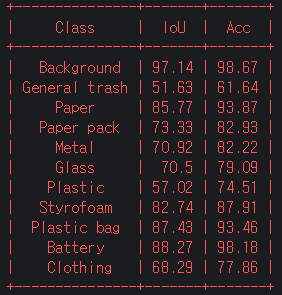
convnext 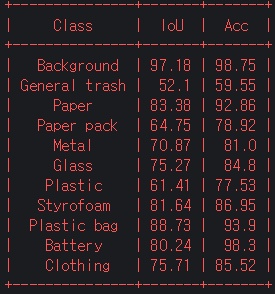

classes = ["General trash","Paper","Paper pack","Metal","Glass","Plastic","Styrofoam","Plastic bag","Battery","Clothing",
]

In [41]:
mask1_weight = [98.67, 61.64, 93.87, 82.93, 82.22, 79.09, 74.51, 87.91, 93.46, 98.18, 77.86]
mask2_weight = [98.75, 59.55, 92.86, 78.92, 81.00, 84.80, 77.53, 86.95, 93.90, 98.30, 85.52]

In [42]:
cnt = 0
for i in tqdm(range(len(mask1))):
    for j in range(len(mask1['PredictionString'][0])):
        if mask1['PredictionString'][i][j] != mask2['PredictionString'][i][j]:
            if mask1_weight[mask1['PredictionString'][i][j]] >= mask2_weight[mask1['PredictionString'][i][j]]:
                tmp1 = copy.deepcopy(mask1['PredictionString'][i][j])
                mask2['PredictionString'][i][j] = tmp1
                cnt += 1
            else:
                tmp1 = copy.deepcopy(mask2['PredictionString'][i][j])
                mask1['PredictionString'][i][j] = tmp1
                cnt += 1

print(cnt)

100%|██████████| 819/819 [08:47<00:00,  1.55it/s]

1698327


In [43]:
tmp1 = df_mask1['PredictionString']

for i in tqdm(range(len(tmp1))):
    tmp2 = df_mask1['PredictionString'][i]
    tmp3 = ' '.join(str(i) for i in tmp2)
    df_mask1['PredictionString'][i] = tmp3

100%|██████████| 819/819 [00:11<00:00, 71.32it/s]


In [44]:
df_mask1.to_csv('/opt/ml/input/code/submission/ensemble_no_pseudo.csv')

In [37]:
from collections import defaultdict

tmp1 = defaultdict(int)
for i in range(11):
    tmp1[str(i)]
tmp1


defaultdict(int,
            {'0': 0,
             '1': 0,
             '2': 0,
             '3': 0,
             '4': 0,
             '5': 0,
             '6': 0,
             '7': 0,
             '8': 0,
             '9': 0,
             '10': 0})

In [ ]:
m = 3
n = 2


In [ ]:
cnt = 0
for i in tqdm(range(len(mask1))):
    for j in range(len(mask1['PredictionString'][0])):

        a = mask1['PredictionString'][i][j]
        b = mask2['PredictionString'][i][j]
        c = mask3['PredictionString'][i][j]
        d = mask4['PredictionString'][i][j]

        if mask1['PredictionString'][i][j] != mask2['PredictionString'][i][j] :
            if mask1_weight[mask1['PredictionString'][i][j]] >= mask2_weight[mask1['PredictionString'][i][j]]:
                tmp1 = copy.deepcopy(mask1['PredictionString'][i][j])
                mask2['PredictionString'][i][j] = tmp1
                cnt += 1
            else:
                tmp1 = copy.deepcopy(mask2['PredictionString'][i][j])
                mask1['PredictionString'][i][j] = tmp1
                cnt += 1

print(cnt)

In [8]:
psedo_data = OrderedDict()
annotations = []

In [12]:
for i in df_mask['PredictionString']:
    psedo_data = OrderedDict()
    
    tmp1 = i.split(' ')
    tmp2 = list(map(int,tmp1))
    tmp2 = np.array(tmp2).reshape((256,256))

    category = np.unique(tmp2)
    if category[0] == 0:
        category = category[1:]

    for idx, j in enumerate(category):
        psedo_data["id"] = idx
        psedo_data["category_id"] = int(j)
        psedo_data["segmentation"] = []
        xy = np.where(tmp2 == j)

        for k in range(len(xy[0])):
            psedo_data["segmentation"].append(int(xy[0][k]))
            psedo_data["segmentation"].append(int(xy[1][k]))

    # psedo_data = json.dumps(psedo_data)

    annotations.append(psedo_data)
    
with open('test1.json','w',encoding='utf-8') as t:
    json.dump(annotations, t, ensure_ascii=False, indent='\t')
